## Pyber

Pyber is a fledgling ride sharing company. Pyber has provided  the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type. 

So, we are assigned the task of analysing the data and report observations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and Merging CSV files

In [2]:
def reading_file(path):
    #variable path is a string which contains the address of .csv file 
    filePath=open(path)
    df=pd.read_csv(filePath)
    #name=filePath.split("/")[1]
    #df_name=
    #return the dataframe
    return df

In [3]:
#read the csv with city details
city_df=reading_file("raw_data/city_data.csv")
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
#read csv with ride details
ride_df=reading_file("raw_data/ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
#merge both df on city
city_ride_df=city_df.merge(ride_df,on="city",how="outer").sort_values("city")
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
1594,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1595,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
1624,Alvarezhaven,21,Urban,2016-07-04 04:28:22,33.31,306054352684
1623,Alvarezhaven,21,Urban,2016-01-27 10:38:40,6.72,6152998520191
1622,Alvarezhaven,21,Urban,2016-05-16 15:33:14,6.45,8939751998750


### city_ride(): 
        -Function used to calculate the rider count, avergae fare per city 

In [6]:
def city_ride():
    # get the unique school id
    city_group_df=city_ride_df["city"].unique()
    # create an empty list
    city_list=[]
    # for each city repeat
    for city in city_group_df:
        # retrieve all info from the merged df based on city
        city_g_df = city_ride_df[city_ride_df["city"] == city]
        # retreive the required details
        total_ride=city_g_df["ride_id"].count()
        city_type=city_g_df["type"].unique()[0]
        driver_count=city_g_df["driver_count"].unique()[0]        
        avg_fare=city_g_df["fare"].sum()/total_ride
        #append details to list
        city_list.append([city,total_ride,city_type,driver_count,avg_fare])
    #create df using list and return    
    city_tot=pd.DataFrame(city_list,columns=['City','Total Ride','Type','Driver Count','Fare Per City'])
    return city_tot

In [7]:
#create the city_sum df by calling city_ride()
city_sum=city_ride()
city_sum.head()


,City,Total Ride,Type,Driver Count,Fare Per City
0,Alvarezhaven,31,Urban,21,23.928710
1,Alyssaberg,26,Urban,67,20.609615
2,Anitamouth,9,Suburban,16,37.315556
3,Antoniomouth,22,Urban,21,23.625000
4,Aprilchester,19,Urban,49,21.981579


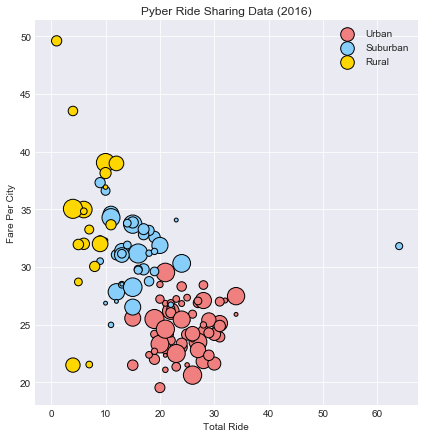

In [18]:
#fig,ax=plt.subplots()
#set style for seaborn graph grid
sns.set_style("darkgrid")
#set size for the markers in correlation with driver count for each city
test = [i*5  for i in city_sum["Driver Count"]]
#set the palette as Pyber specific colors
pal = dict(Urban="lightcoral", Suburban="lightskyblue",Rural="gold")
#set the parameter dictionary
kws = dict(s=test, edgecolor="black")
#create FacetGrid ,that is to be passed to plt
g = sns.FacetGrid(city_sum, hue="Type", palette=pal,hue_order=["Urban", "Suburban","Rural"],legend_out=False,size=6)
#create bubbleplot based on Facetgrid
g = (g.map(plt.scatter,"Total Ride","Fare Per City", **kws))
#set title
plt.legend(markerscale=1,fancybox=True,edgecolor="black",loc="best")
plt.title("Pyber Ride Sharing Data (2016)")
plt.show()

#### Report on PyberRide Sharing data(2016)
<ol>
    <li> The Fare for Urban areas are clustered below 30 and the total rides are below 40
    <li> For Suburban areas, avg fare is nearly 38$ but total rides is 25 and below.
    <li> There is an outlier for SUburban area, which is having high ride count, and driver count is medium.
    <li> The areas where Drivers are more, have lesser fare .

### % Total Fares by City Types


In [9]:
#create a pivot table with index as type and values as mean of fare for each type
type_table = city_ride_df.pivot_table(index='type', values='fare', aggfunc=np.sum).reset_index()
type_table.head()

,type,fare
0,Rural,4255.09
1,Suburban,20335.69
2,Urban,40078.34


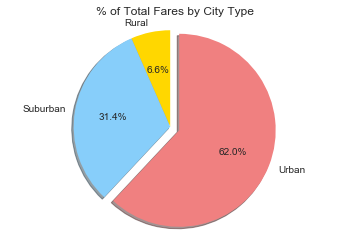

In [10]:
#set color of the piechart Gold, Light Sky Blue, and Light Coral
colors = ["gold","lightskyblue","lightcoral"]
#set to explode Urban
explode = (0,0,0.1)
#plot pie chart
plt.pie(type_table["fare"], explode=explode, labels=type_table["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

#### Report:
<ol>
    <li> The average fare is high for rural areas.
    <li> The average fare is lowest for rural areas.

### %Total Rides by City Types

In [11]:
#create pivot table for sum of ride for each type
type_ride_table = city_sum.pivot_table(index='Type', values='Total Ride', aggfunc=np.sum).reset_index()
type_ride_table.head()

,Type,Total Ride
0,Rural,125
1,Suburban,657
2,Urban,1625


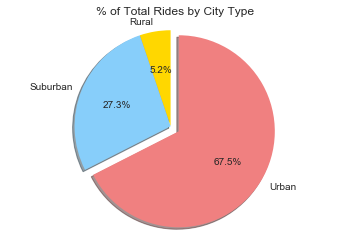

In [12]:
#plot piechart
plt.pie(type_ride_table["Total Ride"], explode=explode, labels=type_ride_table["Type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

#### Report:
<ol>
    <li>Total Rides high for Urban areas
    <li> Total ride lower for Rural areas

### %Total Drivers by City Types

In [13]:
type_driver_table = city_sum.pivot_table(index='Type', values='Driver Count', aggfunc=np.sum).reset_index()
type_driver_table.head()

,Type,Driver Count
0,Rural,104
1,Suburban,635
2,Urban,2607


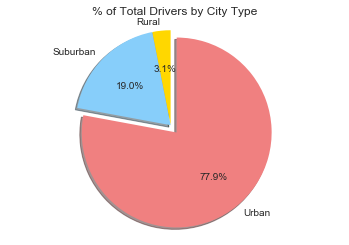

In [14]:
plt.pie(type_driver_table["Driver Count"], explode=explode, labels=type_driver_table["Type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()

#### Report:
<ol>
    <li> The driver count is about 75% of total for Urban areas.
    <li> In Rural areas its only about 3% 

### Final Observations:
<ol>
    <li>Overall, Urban areas have the highest number of rides, drivers and highest average fare.
    <li>Suburban area has a city that has the highest total ride.
    <li>In some cities at Rural areas, where number of drivers are less, fare seems to be higher